<center><h1>Filtering images on the frequency spectrum</h1></center>

El objetivo de esta práctica es familiarizar al alumno con las herramientas básicas de procesamiento de imágenes en el dominio frecuencial utilizando MATLAB. 
 
Utilice la ayuda de MATLAB (help+ comando) para conocer el funcionamiento de los comandos utilizados en este guión. Tenga en cuenta que a lo largo de la práctica puede utilizar las instrucciones clear all y close all para evitar posibles interferencias con otras variables o ventanas. 
 
En esta práctica trabajaremos con las siguientes imágenes binarias: 
- La imagen 'triangulo.bmp'. 
- La imagen 'triangulodesp.bmp', que es una modificación de la anterior donde la posición espacial del triángulo dentro de la imagen es diferente.
- La imagen 'triangulozoom.bmp', versión escalada de 'triangulo.png'. 
- La imagen 'triangulogirado.bmp', versión girada de 'triangulo.png'. 
 

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import lpfilter as lp
import surface_plot as sp

I. Representación de la imagen en el dominio transformado  
 MATLAB ofrece la función fft2 para llevar a cabo la FFT (Transformada Rápida de Fourier, o Fast Fourier Transform) bidimensional. Lea la imagen 'triangulo.bmp', almacénela en la variable X y realice la FFT utilizando las siguientes instrucciones: 
 X_FFT = fftshift(fft2(double(X),256,256)); FFT_modulo=abs(X_FFT); FFT_fase= angle(X_FFT); 
 
 https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html
 https://numpy.org/doc/stable/reference/generated/numpy.imag.html
 

In [15]:
I = cv2.imread('triangulo.bmp',0)
print(I.dtype)

uint8


Explique qué hace cada una de las instrucciones anteriores. Indique la secuencia de instrucciones para representar el módulo y la fase de la FFT de X (haga uso del comando mesh y del comando imshow/imtool considerando la opción de ajuste automático del rango dinámico utilizada en la Práctica 1 de la asignatura). Observe y comente las representaciones obtenidas.  
 
Utilice la FFT para obtener el valor asociado a la componente continua. Indique su valor y detalle cómo lo ha obtenido. Obtenga también el valor medio de la imagen realizando las operaciones que considere oportunas en el dominio espacial, anotando la secuencia de comandos utilizada. ¿Coinciden los dos valores? ¿Por qué? Puede resultar de utilidad leer la ayuda de MATLAB sobre el comando fftshift. 

In [16]:
f = np.fft.fft2(I)
fshift = np.fft.fftshift(f)
f_mod = np.absolute(fshift)
f_phase = np.angle(fshift)

In [ ]:
%matplotlib notebook
plt.figure('modulo')
plt.imshow(f_mod, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

plt.figure('fase')
plt.imshow(f_phase, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

Transformada logarítmica

In [ ]:
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.figure('log')
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

II. Propiedades de la Transformada de Fourier 
 En este apartado comprobaremos tres de las propiedades del módulo de la FFT: traslación, escalado y rotación. Anote las instrucciones necesarias para 1) Leer la imagen 'triangulodesp.bmp' en la variable X y representar módulo y fase de su FFT

In [ ]:
Idesp = cv2.imread('triangulodesp.bmp',0)
fdesp = np.fft.fft2(Idesp)
fdespshift = np.fft.fftshift(fdesp)
fdesp_mod = np.absolute(fdespshift)
fdesp_phase = np.angle(fdespshift)
plt.figure('modulo desp')
plt.imshow(fdesp_mod, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

plt.figure('fase desp')
plt.imshow(fdesp_phase, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

2) Leer la imagen 'triangulozoom.bmp' en la variable X y representar módulo y fase de su FFT

In [ ]:
Izoom = cv2.imread('triangulozoom.bmp',0)
fzoom = np.fft.fft2(Izoom)
fzoomshift = np.fft.fftshift(fzoom)
fzoom_mod = np.absolute(fzoomshift)
fzoom_phase = np.angle(fzoomshift)
plt.figure('modulo zoom')
plt.imshow(fzoom_mod, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

plt.figure('fase zoom')
plt.imshow(fzoom_phase, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

3) Leer la imagen 'triangulogirado.bmp' en la variable X y representar módulo y fase de su FFT 

In [ ]:
Iturn = cv2.imread('triangulogirado.bmp',0)
fturn = np.fft.fft2(Iturn)
fturnshift = np.fft.fftshift(fturn)
fturn_mod = np.absolute(fturnshift)
fturn_phase = np.angle(fturnshift)
plt.figure('modulo turn')
plt.imshow(fturn_mod, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

plt.figure('fase turn')
plt.imshow(fturn_phase, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

Incluya también las representaciones obtenidas. A partir de su visualización y de la comparación con las representaciones asociadas a la FFT de 'triangulo.bmp', justifique qué transformaciones afectan al módulo y cuáles a la fase. Compare estos resultados con los resultados teóricos (se recomienda consultar alguna de las referencias bibliográficas indicadas en la guía docente).

III. Filtrado Paso Bajo en el dominio frecuencial
En este apartado realizaremos el filtrado paso bajo de la imagen 'triangulo.bmp' utilizando dos tipos
de filtros paso bajo (ideal y gaussiano). Teniendo en cuenta que D0 es un número no negativo y
D(u,v) es la distancia del punto (u,v) al centro del filtro:
- la respuesta en frecuencia del filtro paso bajo ideal sigue la expresión
- la respuesta en frecuencia del filtro paso bajo gaussiano sigue la expresión
La función lpfilter proporcionada en esta práctica genera las anteriores respuestas en frecuencia.
Haga uso de su ayuda para obtener:
- Las respuestas en frecuencia de un filtro paso bajo ideal del mismo tamaño que la imagen
'triangulo.bmp' y tres valores de D0: 50, 30 y 10.
- Las respuestas en frecuencia de un filtro paso bajo gaussiano del mismo tamaño que la
imagen 'triangulo.bmp' y tres valores de D0: 50, 30 y 10.

In [17]:
G = lp.lpfilter('gaussian', 256, 256, 30)
print(I)

H = lp.lpfilter('ideal', 256,256, 30)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<IPython.core.display.Javascript object>


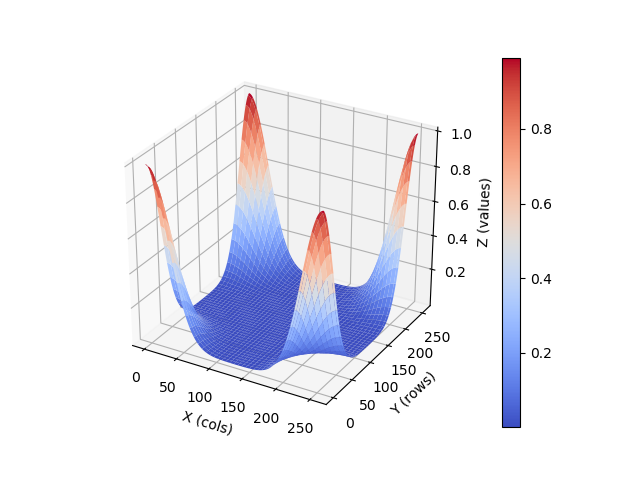

In [19]:
%matplotlib notebook
(fig, ax, surf) = sp.surface_plot(G, cmap=plt.cm.coolwarm)

fig.colorbar(surf)

ax.set_xlabel('X (cols)')
ax.set_ylabel('Y (rows)')
ax.set_zlabel('Z (values)')

plt.show()

<IPython.core.display.Javascript object>


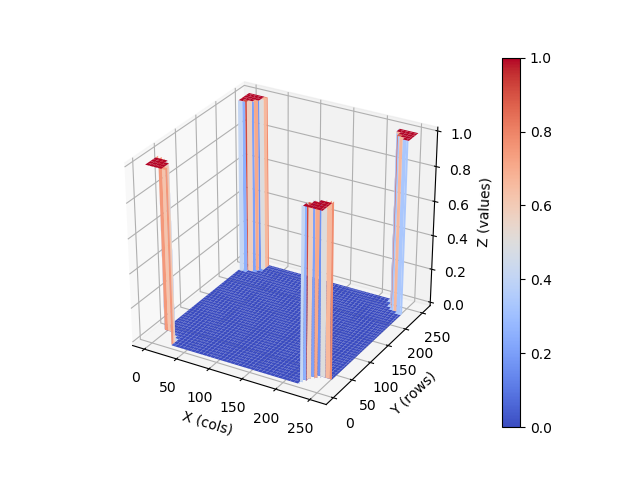

In [20]:
%matplotlib notebook
(fig2, ax2, surf) = sp.surface_plot(H, cmap=plt.cm.coolwarm)

fig2.colorbar(surf)

ax2.set_xlabel('X (cols)')
ax2.set_ylabel('Y (rows)')
ax2.set_zlabel('Z (values)')

plt.show()

<IPython.core.display.Javascript object>


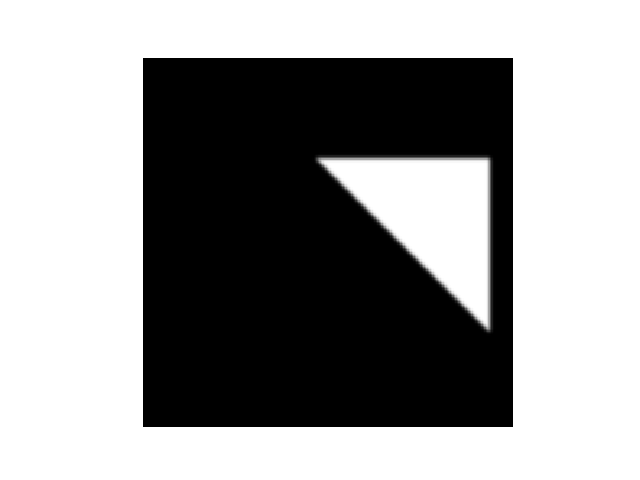

In [21]:
F_G30 = np.multiply(f, G)
img_back = np.fft.ifft2(F_G30)
img_back = np.real(img_back)

plt.figure('filtro gauss 30')
plt.imshow(img_back, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()